In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Creating Dataset

In [2]:
def sigmoid(x):
    return 1 / (1 + np.e**(-x))

In [3]:
N = 20 # samples
data = [[sigmoid(0.3*i), 1] for i in np.arange(0, N//2)] + [[sigmoid(0.3*i)+0.1, 0] for i in np.arange(-N//2, 0)]
data = pd.DataFrame(data)

In [4]:
data

,0,1
0,0.500000,1
1,0.574443,1
2,0.645656,1
3,0.710950,1
4,0.768525,1
5,0.817574,1
6,0.858149,1
7,0.890903,1
8,0.916827,1
9,0.937027,1


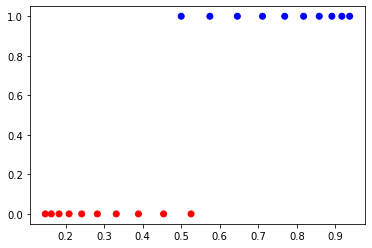

In [5]:
X, y = np.array(data[0]), np.array(data[1])
colormap = np.array(['r', 'b'])
plt.scatter(X, y, c=colormap[y])
plt.show()

# Fitting Sigmoid Curve using Gradient Descent

In [6]:
t0, t1 = 1, 10
def learning_rate(t):
    return t0 / (t + t1)     # learning rate

X_b = np.c_[np.ones(N), X]   # adding 1s
Theta = np.random.randn(2)   # random initialization
iter = 100                   # no of iterations
alpha = 5
for j in range(iter):
    H = X_b.dot(Theta)
    g = np.array([sigmoid(i) for i in H])
    grad = X_b.T.dot(g - y)
    Theta = Theta - (alpha/N) * grad
Theta

array([-5.83050726, 11.34610653])

In [7]:
X_b

array([[1.        , 0.5       ],
       [1.        , 0.57444252],
       [1.        , 0.64565631],
       [1.        , 0.7109495 ],
       [1.        , 0.76852478],
       [1.        , 0.81757448],
       [1.        , 0.85814894],
       [1.        , 0.89090318],
       [1.        , 0.9168273 ],
       [1.        , 0.93702664],
       [1.        , 0.14742587],
       [1.        , 0.16297336],
       [1.        , 0.1831727 ],
       [1.        , 0.20909682],
       [1.        , 0.24185106],
       [1.        , 0.28242552],
       [1.        , 0.33147522],
       [1.        , 0.3890505 ],
       [1.        , 0.45434369],
       [1.        , 0.52555748]])

In [8]:
# predictions
threshold = 0.5
(g >= threshold).astype(int)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

# Using Sklearn's Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
lgs = LogisticRegression()
lgs.fit(X.reshape(-1,1), y)

LogisticRegression()

In [138]:
lgs.predict(X.reshape(-1,1))

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
np.c_[lgs.intercept_, lgs.coef_]

(array([-11.3474917]), array([[1.19447332]]))